In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("cleaned_Data.csv")

In [3]:
data.set_index("date" , inplace = True)
data.index = pd.DatetimeIndex(data.index)

In [4]:
data.head()

,temp,dew_pt,hum,wind_spd,vis,pressure,rain
date,,,,,,,
2018-01-01 02:30:00,69,64,80,2.3,1,29.87,0
2018-01-01 05:30:00,68,65,87,4.6,1,29.84,0
2018-01-01 08:30:00,71,64,71,6.9,1,29.92,0
2018-01-01 11:30:00,79,69,64,4.6,2,29.89,0
2018-01-01 14:30:00,79,64,51,6.9,2,29.82,0


In [5]:
aggregate_data = data.pivot_table(index = data.index.date)

In [6]:
aggregate_data.head()

,dew_pt,hum,pressure,rain,temp,vis,wind_spd
2018-01-01,65.250000,69.250000,29.861250,0.0,73.375000,1.625000,5.175000
2018-01-02,62.500000,68.125000,29.867500,0.0,71.625000,1.625000,4.187500
2018-01-03,60.750000,68.250000,29.903750,0.0,69.750000,1.625000,3.600000
2018-01-04,65.200000,69.400000,29.936000,0.0,73.400000,2.000000,3.460000
2018-01-05,62.428571,73.285714,29.912857,0.0,69.714286,1.714286,2.957143


In [7]:
aggregate_data.drop(["rain"] , axis=1 , inplace=True)

In [8]:
aggregate_data['temp'].values.tolist()

[73.375,
 71.625,
 69.75,
 73.4,
 69.71428571428571,
 69.0,
 68.75,
 69.0,
 67.125,
 68.5,
 70.0,
 72.28571428571429,
 72.75,
 72.57142857142857,
 71.25,
 71.125,
 71.5,
 69.875,
 69.75,
 69.875,
 70.5,
 71.25,
 71.625,
 71.875,
 72.75,
 72.375,
 73.0,
 73.71428571428571,
 71.375,
 72.375,
 73.25,
 74.375,
 74.25,
 73.125,
 72.875,
 73.875,
 73.875,
 75.75,
 76.875,
 76.0,
 77.85714285714286,
 76.75,
 76.75,
 74.625,
 76.25,
 76.875,
 76.75,
 75.125,
 76.125,
 76.0,
 75.875,
 76.5,
 77.0,
 77.0,
 77.375,
 78.25,
 79.375,
 79.0,
 79.25,
 79.5,
 79.57142857142857,
 80.25,
 80.875,
 80.375,
 80.375,
 81.0,
 81.75,
 81.0,
 82.125,
 81.25,
 80.875,
 82.5,
 82.0,
 80.125,
 82.5,
 79.14285714285714,
 81.0,
 81.25,
 81.625,
 81.375,
 81.5,
 82.5,
 82.5,
 82.25,
 82.5,
 81.75,
 80.875,
 81.75,
 82.0,
 81.5,
 80.625,
 81.83333333333333,
 82.125,
 81.375,
 82.14285714285714,
 82.75,
 81.25,
 81.125,
 82.875,
 82.125,
 82.625,
 81.875,
 82.25,
 82.71428571428571,
 84.75,
 85.25,
 85.0,
 83.2857142

In [9]:
column_list = aggregate_data["temp"].values.tolist()

In [10]:
training_len = int(len(column_list)*0.7)

In [11]:
train,test = column_list[:training_len] , column_list[training_len:]

In [12]:
training_data = train[:]
error_list = []
prediction_list = []

In [13]:
for i in test:
    model = ARIMA(training_data , order=(7,0,0))
    model_fit = model.fit(disp=0)
    predicted_value = model_fit.forecast()
    predicted_value = predicted_value[0]
    error = abs(predicted_value-i)
    prediction_list.append(predicted_value)
    error_list.append(error)
    training_data.append(i)
    print('predicted=%f, expected=%f error=%f' % (predicted_value , i ,error))
    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

predicted=84.238777, expected=82.125000 error=2.113777
predicted=82.643313, expected=81.750000 error=0.893313
predicted=82.338131, expected=86.375000 error=4.036869
predicted=85.951965, expected=87.285714 error=1.333749
predicted=86.044725, expected=85.000000 error=1.044725
predicted=84.132735, expected=80.000000 error=4.132735
predicted=80.714099, expected=83.857143 error=3.143044
predicted=84.295188, expected=84.000000 error=0.295188
predicted=84.469969, expected=84.875000 error=0.405031
predicted=84.078146, expected=86.750000 error=2.671854
predicted=86.634817, expected=84.125000 error=2.509817
predicted=82.922367, expected=82.250000 error=0.672367
predicted=82.798271, expected=81.625000 error=1.173271
predicted=82.693507, expected=82.625000 error=0.068507
predicted=83.126377, expected=84.000000 error=0.873623
predicted=84.331887, expected=84.625000 error=0.293113
predicted=84.060778, expected=84.750000 error=0.689222
predicted=83.978804, expected=83.500000 error=0.478804
predicted=

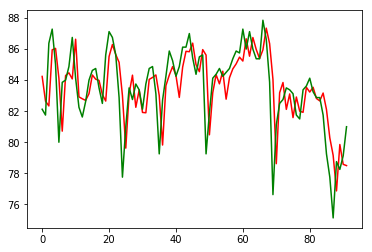

In [14]:
plt.plot(prediction_list,color='r')
plt.plot(test,color='g')


In [15]:
error_list = np.array(error_list)

In [16]:
mean_squared_error(test ,prediction_list)

3.7563689999117145

In [17]:
model = ARIMA(train,order=(7,0,0))
model_fit_train = model.fit(disp=0)
training_error = model_fit_train.resid



C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

In [18]:
training_error

array([-6.00152139, -1.92871942, -2.25285752,  2.97603882, -3.98779573,
       -1.43057506, -0.73565574, -1.03300871, -1.86707545,  0.05393363,
        1.30566709,  2.21246566,  1.37378555,  0.53392466, -0.2924325 ,
       -0.05239185,  0.19403685, -2.13341725, -0.647965  , -0.48970215,
        0.11244672,  0.66058329,  0.28411495,  0.61844949,  1.17347773,
       -0.0157262 ,  0.82979505,  0.92508688, -2.17906678,  0.90128525,
        0.57294313,  0.92953735,  0.36066365, -1.04497407,  0.09282788,
        0.74551315, -0.16020965,  1.78105651,  1.49017312, -0.20463986,
        2.58870455, -0.59963316,  0.3079057 , -1.89071822,  0.83415203,
        0.63354104, -0.54987394, -1.20133051,  0.60802486,  0.01464812,
       -0.42689204,  0.62471817,  0.34229539,  0.38321051,  0.54185887,
        1.08498837,  1.48171105,  0.15763089,  0.67215592,  0.64393021,
        0.26622849,  0.91220314,  0.74202529, -0.12422708,  0.28367843,
        0.75185448,  0.88955103, -0.42902184,  1.24856977, -0.52

In [19]:
train_x = []
train_y = []
for i in range(len(training_error)-7):
    train_x.append(training_error[i:i+7])
    train_y.append(training_error[i+7])

In [20]:
train_y[0]

-1.0330087052133923

In [21]:
train_x[0]

array([-6.00152139, -1.92871942, -2.25285752,  2.97603882, -3.98779573,
       -1.43057506, -0.73565574])

In [22]:
test_x = []
test_y = []

In [23]:
for i in range(len(error_list)-7):
    test_x.append(error_list[i:i+7])
    test_y.append(error_list[i+7])

In [24]:
new_train_x = []
new_train_y = []

In [25]:
for i in train_x:
    new_train_x.append(i.reshape(-1))
    
for i in train_y:
    new_train_y.append(i.reshape(-1))
new_train_x = np.array(new_train_x)
new_train_y = np.array(new_train_y)

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Activation

Using TensorFlow backend.


In [27]:
model = Sequential()

In [28]:
model.add(Dense(100 , activation="tanh" , init="uniform" , input_dim=7))
model.add(Dense(50 , activation="tanh" , init="uniform"))
model.add(Dense(25 , activation="tanh" , init="uniform"))
model.add(Dense(1 , activation="linear"))
model.compile("Adam", loss="mean_squared_error")



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="tanh", input_dim=7, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="tanh", kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="tanh", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
model.fit(new_train_x , new_train_y , batch_size=20, epochs=400,verbose=0)

In [30]:
new_test_x = []
new_test_y = []
for i in test_x:
    new_test_x.append(i.reshape(-1))
    
for i in test_y:
    new_test_y.append(i.reshape(-1))
new_test_x = np.array(new_test_x)
new_test_y = np.array(new_test_y)

In [31]:
predict_error = model.predict(new_test_x)

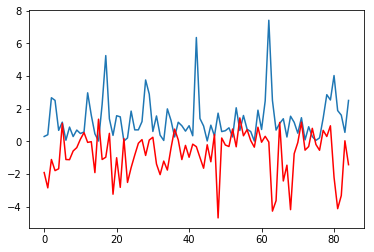

In [32]:
plt.plot(test_y)
plt.plot(predict_error, color="r")

In [33]:
arima_ann_predict = prediction_list[7:]+predict_error

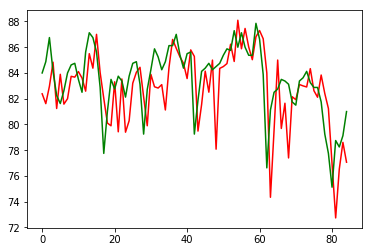

In [34]:
plt.plot(arima_ann_predict,color='r')
plt.plot(test[7:],color='g')
